## T09

María Fernanda Muñoz Sevilla

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from ISLP import load_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### 1

Derivada:
Var[alfaX+(1-alfa)Y]=alfa^2Var[X]+(1+alfa)^2Var[Y]+2alfa(1-alfa)Cov[X,Y]
Sustituyendo:
=alfa^2sigma^2x+(1-alfa)^2sigmay+2alfa(1-alfa)sigmaxy

Derivamos respecto a alfa para la varianza minima

dVar/dalfa =d/dalfa[alfa^2sigmax^2]+d/dalfa[(1-alfa)^2sigmay^2]+d/dalfa[2alfa(1-alfa)sigmaxy]
=2alfasigmax^2-2(1-alfa)sigmay^2+2(1-2alfa)sigmaxy

Igualamos a 0 y despejamos alfa:

alfasigmax^2-(1-alfa)sigmay^2+(1-2alfa)sigmaxy=0
alfa(sigamx^2+sigmay^2-2sigmaxy)=sigmay^2-sigmaxy
alfa=(sigmay^2-sigmaxy)/sigmax^2+sigmay^2-2sigmaxy

### 2

a) si la probabilidad de elegir un elemento es p(j) =1/n, entonces:
p(no j)=1-1/n

b) Bootstrap es con reemplazo, entonces:
1-1/n

c) Si 1-1/n es la probabilidad de que no sea j, entonces seria:
para dos observaciones:
(1-1/n)^2
Para 3:
(1-1/n)^3
Así n veces:
(1-1/n)^n

Entonces la probalidad de que si este al menos una vez es el complemento:
P(si esta)=1-(1-1/n)^n



d)
n=5 
1-(1-1/5)^5=0.672

e)
n=100
1-(1-1/100)^100=0.634

f)
n=10000
1-(1-1/10000)^10000=0.632

Entre más grande el número más se acerca al límite

g)

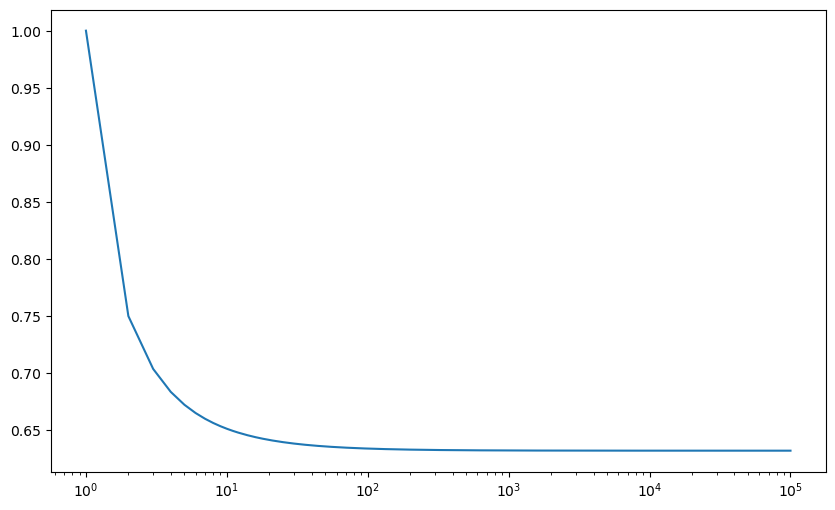

In [2]:

n_values = np.arange(1, 100001)

probabilities = 1 - (1 - 1.0/n_values)**n_values

plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities)
plt.xscale('log')
plt.show()

Vemos que hay un límite en la probabilidad de que j si este en el smapling

h)

In [5]:

rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, size=100, replace=True) == 4) > 0
np.mean(store)

0.6362

La probabilidad es igual que la teorica j=4

### 3

a)

Es un método donde se entrena el modelo con una parte de los datos y se prueba su desempeño con la parte sobrante mediante iteraciones, dando vuelta entera a todos los datos para poder usar todos en distintos tiempos.

b)

i. 
Ventajas respecta a train test: usa todos los datos sin caer en overfiting
Desventaja: es mas pesado y complejo commputacionalmente

ii. 
Ventajas contra LOOCV: más ligero y simple computacionalmente
Desventaja: no usa tantos datos como se podría usar



### 4

Cálculo de la desviación estándar de la predicción:
Tomamos Y para cierta X y le restamos lo que predijimos para que sea misma X
Elevamos al cuadrado la diferencia, sumamos todas las diferencias cuadradas, sacamos la raíz cuadrada de toda la suma y es tenemos la desviación de la predicción

### 5

a)

In [50]:
df =pd.read_csv("C:/Users/munoz/Downloads/lab_apre_est/Default.csv")
default= df.dropna()
X_2 = default[['balance', 'income']]
y = default['default'].map({'Yes': 1, 'No': 0})
modelo_normal = LogisticRegression()
modelo_normal.fit(X_2, y)

LogisticRegression()

i.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)


ii.

In [54]:

modelo_train = LogisticRegression()
modelo_train.fit(X_train, y_train)

LogisticRegression()

iii.

In [56]:
y_pred = modelo_train.predict(X_test)


iv.

In [59]:
fail_1 = np.mean(y_pred != y_test)
print("Failure rate: ",fail_1)

Failure rate:  0.0305


c)

In [62]:
failures = [fail_1]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=i)
    modelo_train = LogisticRegression()
    modelo_train.fit(X_train, y_train)
    y_pred = modelo_train.predict(X_test)
    fail = np.mean(y_pred != y_test)
    failures.append(fail)

print("Los 3 porcentajes de fracaso son: ",failures)

Los 3 porcentajes de fracaso son:  [0.0305, 0.028, 0.027]


Todos dan errores casi iguales, entonces este modelo es bueno para generalizar

d)

In [68]:
# Hacemos lo mismo pero ahora sí usaremos la variable "student" como dummy
default['student'] = default['student'].map({'Yes': 1, 'No': 0})
X_3 = default[['balance', 'income', 'student']]
y = default['default'].map({'Yes': 1, 'No': 0})
modelo_normal = LogisticRegression()
modelo_normal.fit(X_3,y)


LogisticRegression()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=42)

modelo_train = LogisticRegression()
modelo_train.fit(X_train, y_train)

y_pred = modelo_train.predict(X_test)

# Ahora sacamos el porcentaje de fracasos
fail_1 = np.mean(y_pred != y_test)
print("Failure rate: ",fail_1)

# Repetimos todo otras 2 veces
failures = [fail_1]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=i)
    modelo_train = LogisticRegression()
    modelo_train.fit(X_train, y_train)
    y_pred = modelo_train.predict(X_test)
    fail = np.mean(y_pred != y_test)
    failures.append(fail)

print("Los 3 porcentajes de fracaso son: ",failures)

Failure rate:  0.0305
Los 3 porcentajes de fracaso son:  [0.0305, 0.0285, 0.026]


Podemos ver que los porcentajes de error con muy cercanos, esto nos dice que la variable student aporta muy poco, o nada para la predicción

### 6

a)

In [80]:
X_def = default[['balance', 'income']]
X_def = sm.add_constant(X_def)
y = default['default'].map({'Yes': 1, 'No': 0})
modelo_sm = sm.GLM(y, X_def)
resultado = modelo_sm.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                        0.028217
Method:                          IRLS   Log-Likelihood:                 3651.3
Date:                Sun, 30 Nov 2025   Deviance:                       282.08
Time:                        00:30:51   Pearson chi2:                     282.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1316
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0922      0.006    -15.936      0.000      -0.104      -0.081
balance        0.0001   3.51e-06     37.511      0.000       0.000       0.000
income      4.605e-07   1.27e-07      3.613      0.000    2.11e-07     7.1e-07
==============================================================================
"""

b) y c)

In [90]:
def boot_fn(data, indices):
    sample = data.iloc[indices]
    X_sample = sample[['balance', 'income']]
    y_sample = sample['default'].map({'Yes': 1, 'No': 0})
    model = sm.GLM(y_sample, sm.add_constant(X_sample))
    result = model.fit()
    #oeficientes y sus errores estándar
    return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]


boot_fn(default, np.arange(len(default)))
print("intercept coef: ",boot_fn(default, np.arange(len(default)))[0])
print("balance coef: ",boot_fn(default, np.arange(len(default)))[1])
print("income coef: ",boot_fn(default, np.arange(len(default)))[2])
print("intercept std err: ",boot_fn(default, np.arange(len(default)))[3])
print("balance std err: ",boot_fn(default, np.arange(len(default)))[4])
print("income std err: ",boot_fn(default, np.arange(len(default)))[5])

intercept coef:  -0.09223968368080104
balance coef:  0.00013180496967581064
income coef:  4.604567998220737e-07
intercept std err:  0.005788073499029153
balance std err:  3.5138008332258894e-06
income std err:  1.2744425685964168e-07


d)
Podemos observar que los coeficientos anteriores son iguales a los que salen en el summary calculado anteriormente, además de sus errores estándar.

### 7

In [94]:
weekly = load_data('weekly')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


a)

In [102]:

X_weekly = weekly[['Lag1', 'Lag2']]
y_weekly = weekly['Direction'].map({'Up': 1, 'Down': 0}).astype(int)

# Ajuste con scikit-learn
modelo_weekly = LogisticRegression()
modelo_weekly.fit(X_weekly, y_weekly)

print("Sklearn LogisticRegression")
print("Intercept:", modelo_weekly.intercept_)
print("Coefficients (Lag1, Lag2):", modelo_weekly.coef_.ravel())

X_sm = sm.add_constant(X_weekly)
modelo_sm_weekly = sm.Logit(y_weekly, X_sm)
resultado_weekly = modelo_sm_weekly.fit(disp=False)
resultado_weekly.summary()

Sklearn LogisticRegression
Intercept: [0.22122423]
Coefficients (Lag1, Lag2): [-0.03869725  0.06020635]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        00:42:07   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

b)

In [104]:
X_weekly_dropped = X_weekly.iloc[1:]
y_weekly_dropped = y_weekly.iloc[1:]

# Ajuste con scikit-learn
modelo_weekly_dropped = LogisticRegression()
modelo_weekly_dropped.fit(X_weekly_dropped, y_weekly_dropped)

print("Sklearn LogisticRegression")
print("Intercept:", modelo_weekly_dropped.intercept_)
print("Coefficients (Lag1, Lag2):", modelo_weekly_dropped.coef_.ravel())

X_sm_dropped = sm.add_constant(X_weekly_dropped)
modelo_sm_weekly_dropped = sm.Logit(y_weekly_dropped, X_sm_dropped)
resultado_weekly_dropped = modelo_sm_weekly_dropped.fit(disp=False)
resultado_weekly_dropped.summary()

Sklearn LogisticRegression
Intercept: [0.22324303]
Coefficients (Lag1, Lag2): [-0.03840843  0.06080518]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        00:42:14   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

c)

In [107]:
modelo_weekly_dropped.predict(X_weekly.iloc[0:1])


array([1])

Esto es incorrecto

d)

In [112]:
n = len(weekly)
errors = []
for i in range(n):
    #i.
    X_train = X_weekly.drop(index=i)
    y_train = y_weekly.drop(index=i)
    X_test = X_weekly.iloc[i:i+1]
    y_test = y_weekly.iloc[i:i+1]
    
    modelo_loocv = LogisticRegression()
    modelo_loocv.fit(X_train, y_train)
    
    #ii.
    y_pred = modelo_loocv.predict(X_test)

    #iii
    error = int(y_pred != y_test)

    #iv
    errors.append(error)

e)

In [115]:
loocv_error_rate = np.mean(errors)
print("LOOCV Error Rate: ",loocv_error_rate)

LOOCV Error Rate:  0.44995408631772266


Con esto comprobamos que el modelo se equivoca bastante, no es un buen modelo para generalizar

### 8

a) Tomamos n=100 y p=1

In [126]:

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

b)

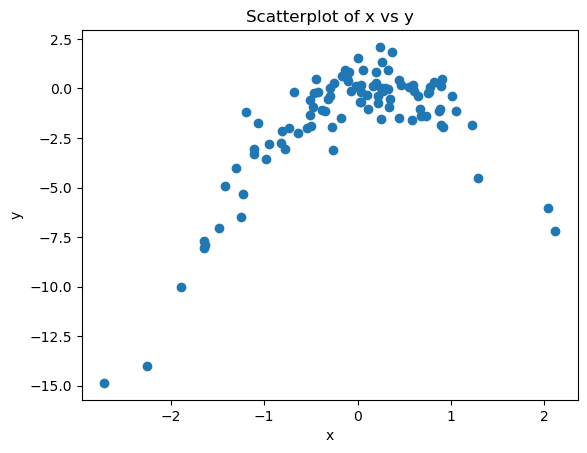

In [131]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')
plt.show()

c)

i.

In [138]:
df1 = pd.DataFrame({'x': x, 'y': y})

loo = LeaveOneOut()

for degree in [1, 2, 3, 4]:
    # Creamos un Pipeline:
    # Generamos las potencias y ajustamos la regresión lineal a esas potencias
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    scores = cross_val_score(model, df1[['x']], df1['y'], cv=loo, scoring='neg_mean_squared_error')
    
    mse = np.mean(np.abs(scores))
    
    print(f"Modelo {degree} (Polinomio  {degree}): MSE = {mse:.5f}")

Modelo 1 (Polinomio  1): MSE = 6.63303
Modelo 2 (Polinomio  2): MSE = 1.12294
Modelo 3 (Polinomio  3): MSE = 1.30180
Modelo 4 (Polinomio  4): MSE = 1.33239


d)

El resultado no cambia porque no hay formas aleatorias distintas de mezclar en un Loocv, es por eso que no importa donde pondamos el random seed, hubieramos tenido los mismos resultados

e)

El modelo con el mejor error fue el modelo grado 2, pues nosotros generamos esos datos.

f)


In [146]:

for degree in [1, 2, 3, 4]:
    model = sm.OLS(y, sm.add_constant(np.vander(x, N=degree+1, increasing=True)))
    results = model.fit()
    print(f"Modelo {degree} (Polinomio grado {degree}):")
    print(results.summary())

Modelo 1 (Polinomio grado 1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        01:06:17   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650 

Podemos ver que el modelo 1 tiene significante a x1, pero si r2 es bajo. Mientras que el modelo dos tiene x1 y x2 significantes con un r2 alto. El 3 x1 y x2 son significantes pero x3 no, y su r2 no cambia tanto del modelo2. Y por último, el modelo 4 solo tiene significantes x1 y x2, x3 y x4 no lo son, y su r2 sigue siendo muy parecida

### 9

In [150]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


a)

In [155]:
mu_gorro = np.mean(boston['medv'])
mu_gorro

22.532806324110677

b)

In [158]:
SE_mu = np.std(boston['medv']) / np.sqrt(len(boston))
SE_mu

0.4084569346972867

c)

In [161]:
B = 1000
mu_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    mu_b = np.mean(sample['medv'])
    mu_bootstrap = np.append(mu_bootstrap, mu_b)
mu_bootstrap_std = np.std(mu_bootstrap)
mu_bootstrap_std

0.41499424996750617

Comparandola con la anterior, podmeos ver que son medias muy parecidad

d)

In [165]:
print(f"Intervalo de confianza medv original: [{mu_gorro - 1.96*SE_mu:.2f}, {mu_gorro + 1.96*SE_mu:.2f}]")
print(f"Intervalo de confianza medv bootstrap: [{mu_gorro - 1.96*mu_bootstrap_std:.2f}, {mu_gorro + 1.96*mu_bootstrap_std:.2f}]")

Intervalo de confianza medv original: [21.73, 23.33]
Intervalo de confianza medv bootstrap: [21.72, 23.35]


Nuevamente vemos que son muy parecidos.

e)

In [169]:
mediana_og = np.median(boston['medv'])
mediana_og

21.2

f)

In [172]:
B = 1000
mediana_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    mediana_b = np.median(sample['medv'])
    mediana_bootstrap = np.append(mediana_bootstrap, mediana_b)
mediana_bootstrap_std = np.std(mediana_bootstrap)
mediana_bootstrap_std

0.3757233556754222

Podemos decir que es una meda estable o sólida pues se parece al promedio

g)

In [176]:
medv_per_10 = np.percentile(boston['medv'], 10)
medv_per_10

12.75

In [178]:
B = 1000
per_10_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    per_10_b = np.percentile(sample['medv'], 10)
    per_10_bootstrap = np.append(per_10_bootstrap, per_10_b)
per_10_bootstrap_std = np.std(per_10_bootstrap)
per_10_bootstrap_std

0.5303787113940378

In [ ]:
Esto nos arroja un dato más variable, pero sigue siendo estable.